In [136]:
#物件(object)建構式
class sample:
    
    def __init__(self,ID,sex,Li,age,result):
        self.ID = ID
        self.sex = sex
        self.Li = Li
        self.age = age
        self.result = result

        

In [175]:
#讀取資料，建立dataframe

import pandas as pd
import numpy as np
import scipy.stats as stats
import os
import matplotlib.pyplot as plt

file = open('D:\\YAO\\DATA\\WC_2016年抽血.csv',encoding='big5')
data_list = []
for i in file.readlines():
    data = i.strip()
    data = data.split(',')
    data_list.append(data)
file.close()

file_df = pd.DataFrame(data_list[1:],columns=data_list[0])

condiction = input('是否列印DATAFRAME(y/n)：')
if condiction == 'y':
    print('csv資料：')
    print(file_df)
    print('----------------')

是否列印DATAFRAME(y/n)：y
csv資料：
       ID Sex   Li Age    Result
0   WC001  NA  武慶里  50  Positive
1   WC002  NA  武慶里  69  Positive
2   WC003  NA  武慶里  55  Negative
3   WC004  NA  武慶里  67  Positive
4   WC005  NA  武慶里  65  Negative
5   WC006  NA  武慶里  67  Negative
6   WC007  NA  武慶里  80  Positive
7   WC008  NA  武慶里  55  Positive
8   WC009  NA  武慶里  47  Negative
9   WC010  NA  武慶里  54  Positive
10  WC011  NA  武慶里  68  Positive
11  WC012  NA  武慶里  58  Positive
12  WC013  NA  武慶里  68  Positive
13  WC014  NA  武慶里  63  Negative
14  WC015  NA  武慶里  75  Positive
15  WC016  NA  武慶里  68  Positive
16  WC017  NA  武慶里  77  Positive
17  WC018  NA  武慶里  77  Positive
18  WC019  NA  武慶里  52  Negative
19  WC020  NA  武慶里  54  Negative
20  WC021  NA  武慶里  69  Negative
21  WC022  NA  武慶里  26  Positive
22  WC023  NA  武慶里  54  Negative
23  WC024  NA  武慶里  52  Positive
24  WC025  NA  武慶里  52  Positive
25  WC026  NA  武慶里  30  Negative
26  WC027  NA  武慶里  69  Positive
27  WC028  NA  武慶里  71  Positive
28  WC029  NA  

In [171]:
#建立物件:
ID = list(file_df.ix[:,'ID'])
sex = list(file_df.ix[:,'Sex'])
Li = list(file_df.ix[:,'Li'])
age = list(map(int,list(file_df.ix[:,'Age'])))
result = list(file_df.ix[:,'Result'])

#利用list建立物件
sample_ls = []
for i in range(len(file_df)):
    sample_ls.append(sample(ID[i],sex[i],Li[i],age[i],result[i]))

In [172]:
#先5歲年齡切切看
Age5Cutter = []
min1 = 0
max1 = 4
min_max = [min1,max1]
Age5Cutter.append(min_max)
for i in range(18):
    min1 += 5
    max1 += 5
    min_max = [min1,max1]
    Age5Cutter.append(min_max)
#print(Age5Cutter)

#算物件
ToPlot_5Age = []
for i in range(len(Age5Cutter)):
    cutted_age_number = sum(Age5Cutter[i][0] <= p.age <= Age5Cutter[i][1] for p in sample_ls)
    print('[%d - %d 歲]'%(Age5Cutter[i][0],Age5Cutter[i][1]),':',cutted_age_number)
    ToPlot_5Age.append([Age5Cutter[i],cutted_age_number ])

#最大最小年齡   
print("最小年齡:",min(p.age for p in sample_ls),'歲')
print("最大年齡:",max(p.age for p in sample_ls),'歲')

[0 - 4 歲] : 0
[5 - 9 歲] : 0
[10 - 14 歲] : 0
[15 - 19 歲] : 0
[20 - 24 歲] : 0
[25 - 29 歲] : 2
[30 - 34 歲] : 2
[35 - 39 歲] : 2
[40 - 44 歲] : 3
[45 - 49 歲] : 2
[50 - 54 歲] : 8
[55 - 59 歲] : 5
[60 - 64 歲] : 2
[65 - 69 歲] : 13
[70 - 74 歲] : 6
[75 - 79 歲] : 3
[80 - 84 歲] : 1
[85 - 89 歲] : 0
[90 - 94 歲] : 0
最小年齡: 26 歲
最大年齡: 80 歲


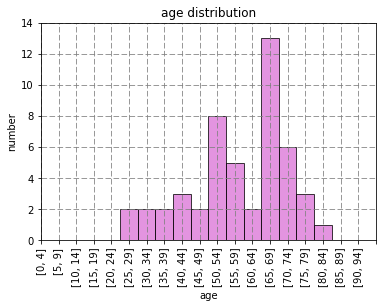

In [133]:
#Age的Histogram
hist_age_ls = list(p.age for p in sample_ls)
plt.hist(hist_age_ls, alpha=0.75,rwidth=True,bins=range(5,100,5),edgecolor='black', linewidth=1, facecolor='orchid')

plt.xlabel('age')
plt.ylabel('number')
plt.title('age distribution')
plt.axis([20, 90, 0, 14])
xticks = [2.5]
start = 2.5
for i in range(len(Age5Cutter)):
    start += 5
    xticks.append(start)

plt.xticks( xticks,Age5Cutter , rotation=90  )
plt.grid(linestyle='--', which='major',color='gray')
plt.show()

In [24]:
#切年紀

age_cutters = []
i = 1
print('切點為：[?-?]')
while True:
    age_cutter_min = eval(input('請輸入第%d個區間範圍的最小值：'%i))
    age_cutter_max = eval(input('請輸入第%d個區間範圍的最大值：'%i))
    age_cutter = [age_cutter_min,age_cutter_max]
    age_cutters.append(age_cutter)
    print('第%d切點為：[%d-%d]'%(i,age_cutter_min,age_cutter_max))
    print('-------------------')
    i += 1
    ask = input('是否結束輸入(y/n):')
    if ask == 'y':
        break
print('age_cutters：',age_cutters)
print('--------已經切好年齡，物件名稱為：age_cutters---------')



切點為：[?-?]
請輸入第1個區間範圍的最小值：26
請輸入第1個區間範圍的最大值：80
第1切點為：[26-80]
-------------------
是否結束輸入(y/n):y
age_cutters： [[26, 80]]
--------已經切好年齡，物件名稱為：age_cutters---------


In [25]:
#區分各年齡pos和neg數目
aged_PosNeg_ls = []
for i in range(len(age_cutters)):   
    pos_number = sum(age_cutters[i][0] <= p.age <= age_cutters[i][1] and p.result=='Positive' for p in sample_ls)
    neg_number = sum(age_cutters[i][0] <= p.age <= age_cutters[i][1] and p.result=='Negative' for p in sample_ls)
    aged_PosNeg_ls.append([pos_number ,neg_number]) 
    
print('可利用list：age_cutters 和 aged_PosNeg_ls')

#存成chisqure表格模式:
os.chdir('D:\\YAO\\output')
f1 = open('--output--年齡chisquare表格.csv','w')
f1.write('年齡'+','+'Positive'+','+'Negative'+','+'Total'+'\n')
total_pos = 0
total_neg = 0
for i in range(len(aged_PosNeg_ls)):
    total_perage = aged_PosNeg_ls[i][0] + aged_PosNeg_ls[i][1]
    
    f1.write('%d - %d歲'%(age_cutters[i][0],age_cutters[i][1]) + ',')
    f1.write(str(aged_PosNeg_ls[i][0]))
    f1.write(',')
    f1.write(str(aged_PosNeg_ls[i][1]))
    f1.write(',')
    f1.write(str(total_perage))
    f1.write('\n')
    
    total_pos += aged_PosNeg_ls[i][0]
    total_neg += aged_PosNeg_ls[i][1]
    
f1.write('Total'+',')
f1.write(str(total_pos))
f1.write(',')
f1.write(str(total_neg))
f1.write(',')
f1.write(str(total_neg + total_pos))
f1.write('\n')
f1.close()


可利用list：age_cutters 和 aged_PosNeg_ls


In [156]:
#先5歲年齡切切看
Age5Cutter = []
min1 = 0
max1 = 4
min_max = [min1,max1]
Age5Cutter.append(min_max)
for i in range(20):
    min1 += 5
    max1 += 5
    min_max = [min1,max1]
    Age5Cutter.append(min_max)
#print(Age5Cutter)

#算物件
for i in range(len(Age5Cutter)):
    print(Age5Cutter[i],':',sum(Age5Cutter[i][0] <= p.age <= Age5Cutter[i][1] for p in sample_ls))
#最大最小年齡   
print("最小:",min(p.age for p in sample_ls))
print("最大:",max(p.age for p in sample_ls))

[0, 4] : 0
[5, 9] : 0
[10, 14] : 0
[15, 19] : 0
[20, 24] : 0
[25, 29] : 0
[30, 34] : 0
[35, 39] : 1
[40, 44] : 13
[45, 49] : 13
[50, 54] : 22
[55, 59] : 28
[60, 64] : 44
[65, 69] : 158
[70, 74] : 130
[75, 79] : 85
[80, 84] : 35
[85, 89] : 16
[90, 94] : 3
[95, 99] : 0
[100, 104] : 0
最小: 39
最大: 92


In [188]:
#object filter練習  [依照不同ID代號 。建立新的物件list]：
ID_code = input('請輸入ID代號(一碼)：')

if len(ID_code)==1:
    list_ID=list(p.ID[0]==ID_code for p in sample_ls)
    sample_ls_fil1 = [] 
    for i in range(len(sample_ls)):
        if list_ID[i]:
            sample_ls_fil1.append(sample_ls[i])
elif len(ID_code)==2:
    list_ID=list(p.ID[0:2]==ID_code for p in sample_ls)
    sample_ls_fil1 = [] 
    for i in range(len(sample_ls)):
        if list_ID[i]:
            sample_ls_fil1.append(sample_ls[i])
print('依照ID代號過濾後的物件集合為:sample_ls_fil1')

請輸入ID代號(一碼)：WC
依照ID代號過濾後的物件集合為:sample_ls_fil1


In [187]:
sample_ls_fil1